# Mini-Project: Resume Classification
## Prashanth Kannadaguli
### Senior Data Science Trainer

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data preprocessing, EDA and feature extraction on the Resume dataset
* perform multinomial Naive Bayes classification on the Resume dataset

### Dataset description

The data is in CSV format, with two features: Category, and Resume. 

**Category** -  Industry sector to which the resume belongs to, and 

**Resume** - The complete CV (text) of the candidate.

## Information

Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates. Finding suitable candidates for an open role from a database of 1000s of resumes can be a tough task. Automated resume categorization can speeden the candidate selection process. Such automation can really ease the tedious process of fair screening and shortlisting the right candidates and aid quick decisionmaking.

To learn more about this, click [here](https://www.sciencedirect.com/science/article/pii/S187705092030750X).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### Downloading the data

In [2]:
#@title Download the dataset


**Exercise 1: Read the UpdatedResumeDataset.csv dataset**

**Hint:** pd.read_csv()

In [4]:
# read the dataset
# YOUR CODE HERE
data = pd.read_csv("/content/UpdatedResumeDataSet.csv")

### Pre-processing and EDA

**Exercise 2: Display  all the categories of resumes and their counts in the dataset**



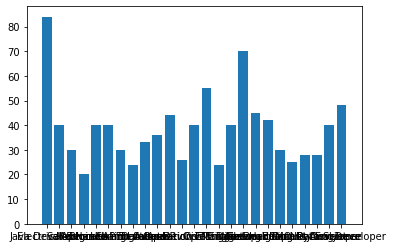

In [5]:
# Display the distinct categories of resume
# YOUR CODE HERE
data.describe()
cat = data["Category"]
dog = set(cat)
dogs = list(dog)
counts = []
for i in dog:
  count=0
  for j in cat:
    if j == i:
      count+=1
  counts.append(count)    
plt.bar(dogs,counts)
plt.show()  

In [6]:
# Display the distinct categories of resume and the number of records belonging to each category
# YOUR CODE HERE
for i in range(len(list(dog))):
  print(dogs[i],":",counts[i])  

Java Developer : 84
Sales : 40
Electrical Engineering : 30
Advocate : 20
Blockchain : 40
Mechanical Engineer : 40
Health and fitness : 30
SAP Developer : 24
Database : 33
Arts : 36
HR : 44
Automation Testing : 26
Operations Manager : 40
DevOps Engineer : 55
Civil Engineer : 24
ETL Developer : 40
Testing : 70
Web Designing : 45
Hadoop : 42
PMO : 30
Network Security Engineer : 25
Business Analyst : 28
DotNet Developer : 28
Data Science : 40
Python Developer : 48


**Exercise 3: Create the count plot of different categories**

**Hint:** Use `sns.countplot()`

<Axes: xlabel='Category', ylabel='count'>

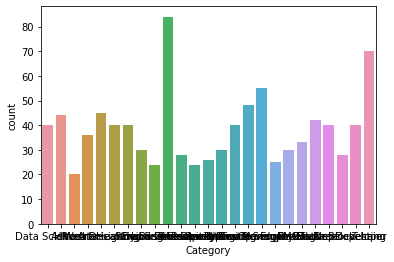

In [7]:
# YOUR CODE HERE
sns.countplot(x=data.Category)

**Exercise 4: Create a pie plot depicting the percentage of resume distributions category-wise**

**Hint:** Use [plt.pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and [plt.get_cmap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for color mapping the pie chart.

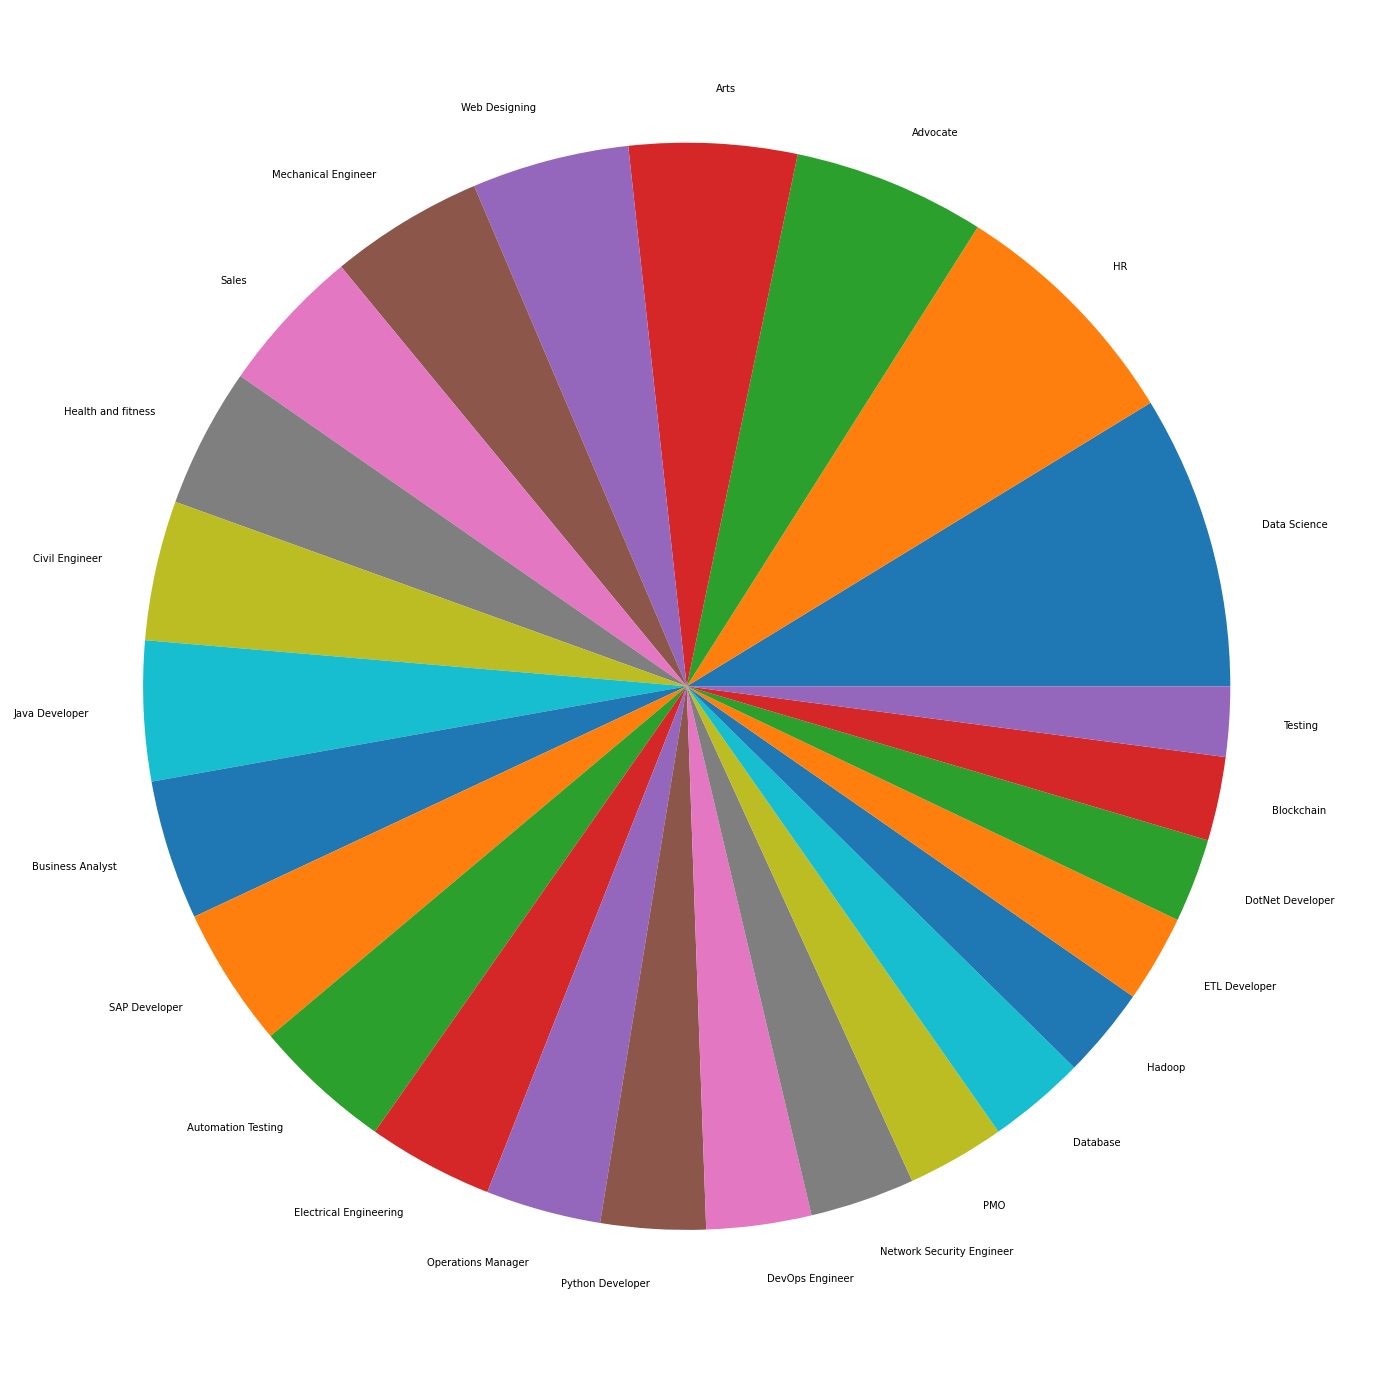

In [8]:
targetCounts = data['Category'].value_counts()
targetLabels  = data['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

# YOUR CODE HERE to display pie chart with color coding (eg. `coolwarm`)
plt.pie(targetCounts,labels=targetLabels)
plt.show()

**Exercise 5: Convert all the `Resume` text to lower case**




In [9]:
# Convert all characters to lowercase
# YOUR CODE HERE
data.Resume.str.lower()

0      skills * programming languages: python (pandas...
1      education details \r\nmay 2013 to may 2017 b.e...
2      areas of interest deep learning, control syste...
3      skills â¢ r â¢ python â¢ sap hana â¢ table...
4      education details \r\n mca   ymcaust,  faridab...
                             ...                        
957    computer skills: â¢ proficient in ms office (...
958    â willingness to accept the challenges. â ...
959    personal skills â¢ quick learner, â¢ eagerne...
960    computer skills & software knowledge ms-power ...
961    skill set os windows xp/7/8/8.1/10 database my...
Name: Resume, Length: 962, dtype: object

### Cleaning resumes' text data

**Exercise 6: Define a function to clean the resume text**

In the text there are special characters, urls, hashtags, mentions, etc. Remove the following:  

* URLs: For reference click [here](https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python)
* RT | cc: For reference click [here](https://www.machinelearningplus.com/python/python-regex-tutorial-examples/)
* Hashtags, # and Mentions, @
* punctuations
* extra whitespace

PS: Use the provided reference similarly for removing any other such elements.

After cleaning as above, store the Resume Text in a separate column (New Feature).
 

In [18]:
import re
def cleanResume(tweet):
  tweet = re.sub('http\S+\s*', '', tweet)  # remove URLs
  tweet = re.sub('RT|cc', '', tweet)  # remove RT and cc
  tweet = re.sub('#\S+', '', tweet)  # remove hashtags
  tweet = re.sub('@\S+', '', tweet)  # remove mentions
  tweet = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', tweet)  # remove punctuations
  tweet = re.sub(r'[^\x00-\x7f]',r' ', tweet)
  tweet = re.sub('\s+', ' ', tweet)  # remove extra whitespace
  return tweet

In [19]:
 # apply the function defined above and save the 
 # YOUR CODE HERE
data['cleaned_resume'] = data['Resume'].apply(lambda x: cleanResume(x))

In [20]:
sent_lens = []
for i in data.cleaned_resume:
    length = len(i.split())
    sent_lens.append(length)
    
print(len(sent_lens))
print(max(sent_lens))

962
2014


### Stopwords removal

The stopwords, for example, `and, the, was, and so forth` etc. appear very frequently in the text and are not helpful in the predictive process. Therefore these are usually removed for text analytics and text classification purposes.

1. Tokenize the input words into individual tokens and store it in an array
2. Using `nltk.corpus.stopwords`, remove the stopwords 

Hint: See Module 1 - Assignment 4 'Text Classification using Naive Bayes'


**Exercise 7: Use `nltk` package to find the most common words from the `cleaned resume` column**

**Hint:** 
* Use `nltk.FreqDist`


In [26]:
# stop words
# YOUR CODE HERE to print the stop words in english language
heh = set(stopwords.words("english")+['``',"''"])

In [27]:
# most common words
# YOUR CODE HERE
totalWords = []
Sentences = data["cleaned_resume"].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in heh and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 326), ('description', 310), ('1', 290), ('year', 228), ('January', 216), ('Less', 204), ('Data', 196), ('data', 192), ('Maharashtra', 166), ('6', 160), ('Skill', 160), ('Science', 154), ('Python', 148), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Education', 122), ('Learning', 116), ('I', 116), ('India', 114), ('University', 112), ('Web', 106), ('Machine', 104), ('using', 104), ('monthsCompany', 102), ('time', 92), ('Project', 92), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('learning', 86), ('SQL', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72), ('Used', 72), ('Skills', 70), ('2', 70)]


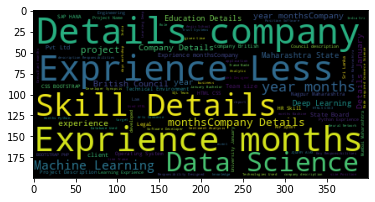

In [28]:
# YOUR CODE HERE to show the most common word using WordCloud
a = WordCloud().generate(cleanedSentences)
plt.imshow(a)
plt.show()

**Exercise 8: Convert the categorical variable `Category` to a numerical feature and make a different column, which can be treated as the target variable**

**Hint:** Use [`sklearn.preprocessing.LabelEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) method

In [29]:
from sklearn.preprocessing import LabelEncoder

# YOUR CODE HERE
labelencoder = LabelEncoder()
data["Category_Labelled"] = labelencoder.fit_transform(data["Category"])

### Feature Extraction

**Exercise 9: Convert the text to feature vectors by applying `tfidf vectorizer` to the Label encoded category made above**

`TF-IDF`will tokenize documents, learn the vocabulary, inverse document frequency weightings, and allow you to encode new documents

**Hint:** Use [`TfidfVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).



In [31]:
# YOUR CODE HERE
Text = data['cleaned_resume'].values
op_labels = data['Category_Labelled'].values
word_vectorizer = TfidfVectorizer(max_features = 1500)
word_vectorizer.fit(Text)
features = word_vectorizer.transform(Text)

## Naive Bayes Classifier

**Exercise 10: Split the data into train and test sets. Apply Naive Bayes Classifier (MultinomialNB) and evaluate the model predictions** 

**Hint:** Use Vectorized features made above as X and Labelled category as y.

In [36]:
# YOUR CODE HERE 
x_train,x_test,y_train,y_test = train_test_split(features,op_labels,random_state=0, test_size=0.35)
yo = MultinomialNB()
yo.fit(x_train,y_train)
print('Accuracy of NaiveBayes Classifier on training set: {:.2f}'.format(yo.score(x_train, y_train)))
yo1 = yo.predict(x_test)
print("\n Classification report for classifier %s:\n%s\n" % (yo, metrics.classification_report(y_test, yo1)))

Accuracy of NaiveBayes Classifier on training set: 0.93

 Classification report for classifier MultinomialNB():
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.89      1.00      0.94         8
           2       1.00      0.67      0.80         9
           3       1.00      1.00      1.00        17
           4       1.00      0.64      0.78        11
           5       1.00      0.55      0.71        11
           6       1.00      0.88      0.93        16
           7       1.00      1.00      1.00        10
           8       1.00      0.89      0.94        18
           9       1.00      0.27      0.43        11
          10       1.00      1.00      1.00        13
          11       1.00      0.64      0.78        14
          12       1.00      0.94      0.97        18
          13       1.00      1.00      1.00        16
          14       1.00      1.00      1.00        11
          15       0.63

Dataset Source Reference: [Resume dataset](https://www.kaggle.com/gauravduttakiit/resume-dataset/download) 